In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("Fraud_check.csv")

In [2]:
#finding rows and cols
df.shape

(600, 6)

In [3]:
#first 5 rows
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
# Univariate Analysis
# Get descriptive statistics for a single variable
df.describe()


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#finding any null values
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
# Bivariate Analysis
# Get correlation between two variables
df["Taxable.Income"].corr(df["City.Population"])

-0.06438692074174586

array([[<Axes: title={'center': 'Taxable.Income'}>,
        <Axes: title={'center': 'City.Population'}>]], dtype=object)

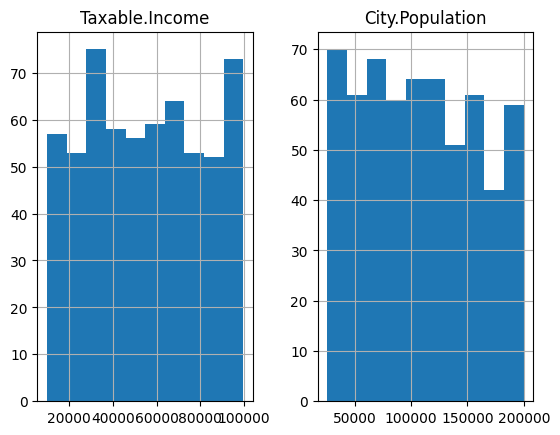

In [7]:
#Plotting histogram for two variables
df[['Taxable.Income','City.Population']].hist()

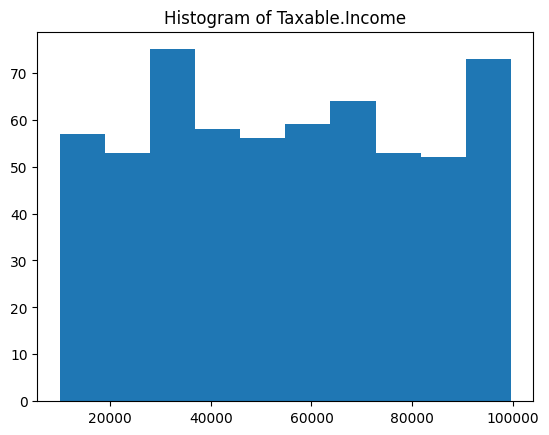

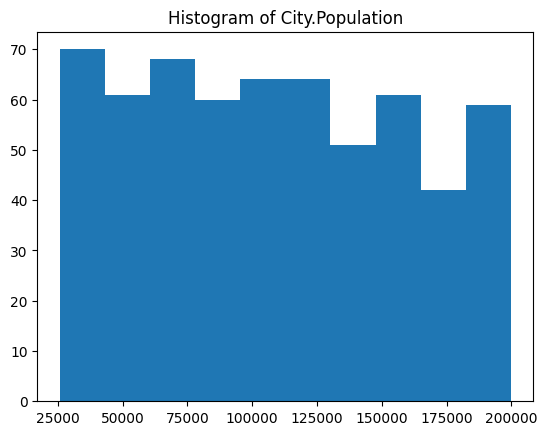

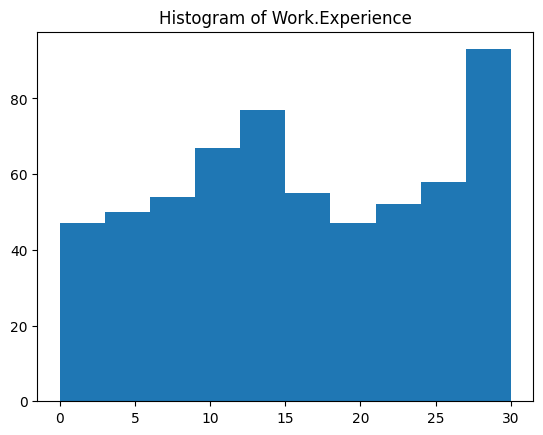

In [8]:
# Loop through each continious variable and create a histogram
import matplotlib.pyplot as plt
for x_variable in df.select_dtypes(include=["int64"]):
  plt.hist(df[x_variable])
  plt.title("Histogram of " + x_variable)
  plt.show()


In [9]:
# So by seeing the histogram., we can conclude that the data following normal distribution for all continious variables

In [10]:
# Making flags
###############------treating those who have taxable_income <= 30000 as "Risky" and others are "Good" -------###############################

In [11]:
# Create a new column 'risk_flag' based on taxable_income
df['Risk_flag'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [12]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk_flag
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Risk_flag        600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [14]:
#Label Encoding the obj Dtypes
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.select_dtypes(include=["object"]):
    df[column] = LE.fit_transform(df[column])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk_flag
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [15]:
#choosing X and Y variables
y=df["Risk_flag"]
x=df.iloc[:,:-1]
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [16]:
#standardization will fit the values b/w -3 to +3

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
#giving columns names to the converted data
SS_x.columns = list(x)
SS_x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,-1.040833,1.160800,0.520362,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,-0.821464,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,-0.698292,1.033109,1.634639,0.993355
3,0.960769,1.160800,-0.191666,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,0.985129,-1.630532,1.408261,-1.006689


In [17]:
#Data partition
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 6)
(180, 6)
(420,)
(180,)


In [18]:
#fitting model -------------by using Random Forest---------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,max_features=0.7,max_samples=0.6)
# taking n_estimators = 100 i.e., 100 decision trees formed step by step
#taking max_samples = 0.6
# max_features = 0.7
Rf.fit(x_train,y_train)
y_pred_train = Rf.predict(x_train)
y_pred_test = Rf.predict(x_test)
#
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_train,y_pred_train)
ac2=accuracy_score(y_test,y_pred_test)
variance = ac1-ac2
print("Trainig accuracy",ac1.round(3))
print("Test accuracy",ac2.round(3))
print("Variance is ",variance.round(3))

Trainig accuracy 1.0
Test accuracy 0.994
Variance is  0.006


In [19]:
#-------------RandomForest classifier --------cross validation method--------------------------------------
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,max_features=0.7,max_samples=0.6)

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    Rf.fit(x_train,y_train)
    y_pred_train = Rf.predict(x_train)
    y_pred_test = Rf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
print("Cross validation trainig score with Random Forest Approach ",np.mean(training_accuracy).round(3))
print("Cross validation test score with Random Forest Approach",np.mean(test_accuracy).round(3))
print("Variance between Training and Testing with Random Forest Approach:",(ac1-ac2).round(3))

Cross validation trainig score with Random Forest Approach  1.0
Cross validation test score with Random Forest Approach 0.998
Variance between Training and Testing with Random Forest Approach: 0.002


In [20]:
# By doing cross validation method for Random forest classifier with given parameters.., we are getting good training accuracy and Test accuracy
# with 0.002 variance.., so our model is best fitted

In [21]:
# grid search cv method for above Random Forest classifier

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [50, 100, 150],
    'max_features': [0.5, 0.6, 0.7],
    'max_samples': [0.5, 0.6, 0.7],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}
# Create a decision tree classifier
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=1, n_jobs = -1)
# Fit the grid search to the training set
grid_search.fit(x_train, y_train)
# Make predictions using the best model
y_pred = grid_search.predict(x_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)
# Print the best parameters
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Accuracy of the model: 1.0
Best parameters: {'max_depth': 100, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [22]:
#cross validation method ------------------------- # Decision tree method----------------------------------
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(x_train,y_train)
    y_pred_train = dt.predict(x_train)
    y_pred_test = dt.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
print("Cross validation trainig score ",np.mean(training_accuracy).round(3))
print("Cross validation test score",np.mean(test_accuracy).round(3))
print("Variance between Training and Testing :",(ac1-ac2).round(3))

Cross validation trainig score  1.0
Cross validation test score 0.998
Variance between Training and Testing : 0.002


In [23]:
# printing max nodes and deapth of Decision tree
print("The no of nodes in the tree:",dt.tree_.node_count)
print("The no of Depth of the tree:",dt.tree_.max_depth)


The no of nodes in the tree: 3
The no of Depth of the tree: 1


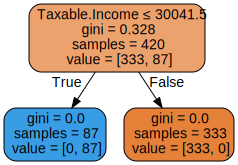

In [24]:
# Graphical view of Decision tree
from sklearn.tree import export_graphviz
#!pip install graphviz
import graphviz
dot_data = export_graphviz(dt, out_file=None, feature_names=x.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
# Display the graph
graph


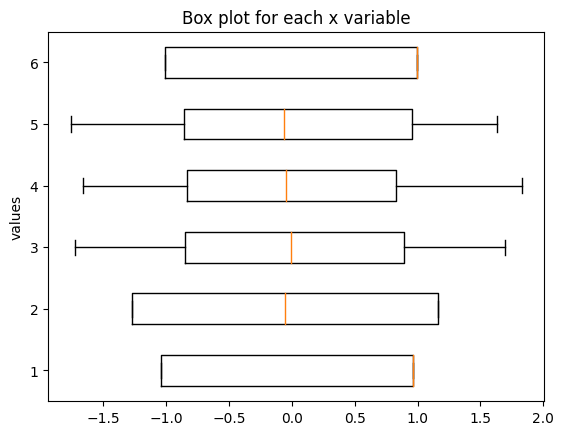

In [25]:
#-------------------Univariate analysis-----------------------------------------------
#constructing box for all x_variables value counts
#Visualizing the data
import matplotlib.pyplot as plt
plt.boxplot(SS_x,vert=False)
plt.title("Box plot for each x variable")
plt.ylabel("values")
plt.show()

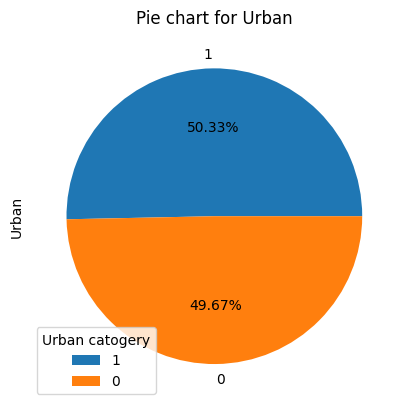

In [26]:
##-------------------Univariate analysis-----------------------------------------------
#constructing pie-chart for Taxable.Income variable value counts

import matplotlib.pyplot as plt
df['Urban'].value_counts().plot(kind='pie',autopct='%1.2f%%')
#autopct='%1.2f%%' ----> it gives what % of single catogery occupied on entire
plt.legend(title="Urban catogery") #gives which color is for which one
plt.title("Pie chart for Urban")
plt.show()


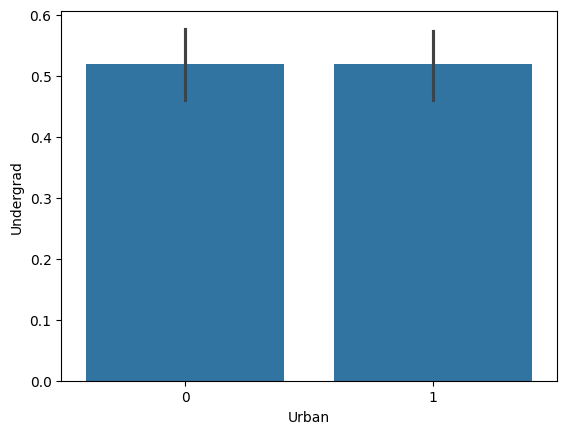

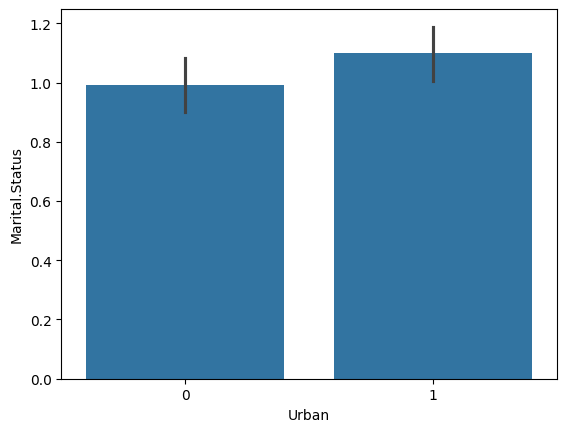

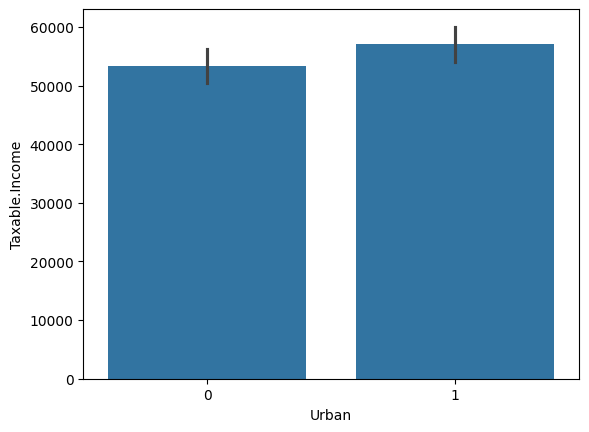

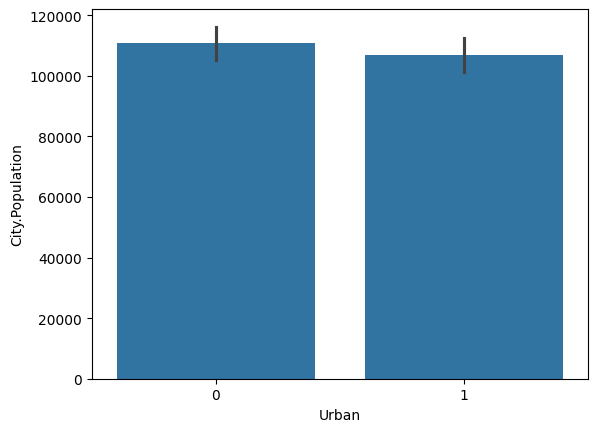

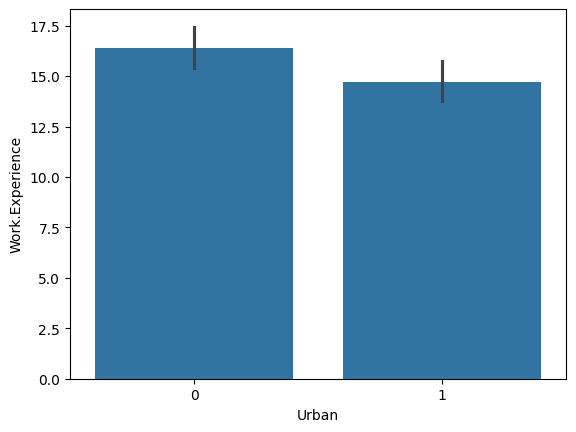

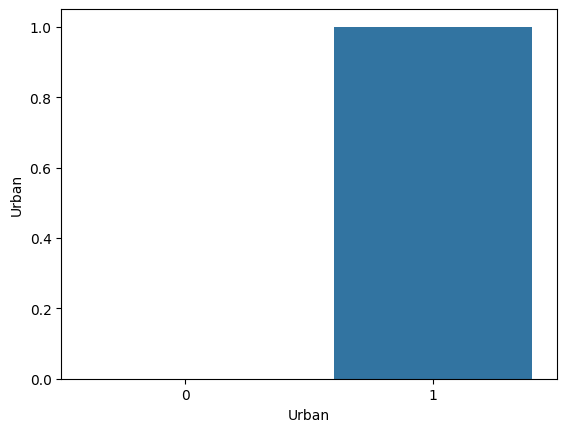

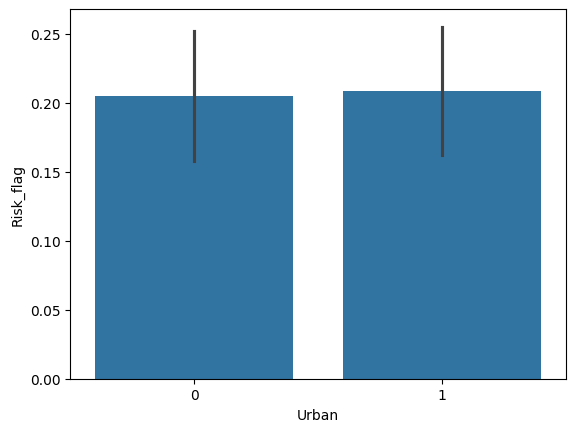

In [27]:
##Bar graph for every x- variable with Urban
import seaborn as sns
import matplotlib.pyplot as plt
for column in df.select_dtypes(include=["int64"]):
  sns.barplot(x=df['Urban'], y=df[column])
  plt.show()


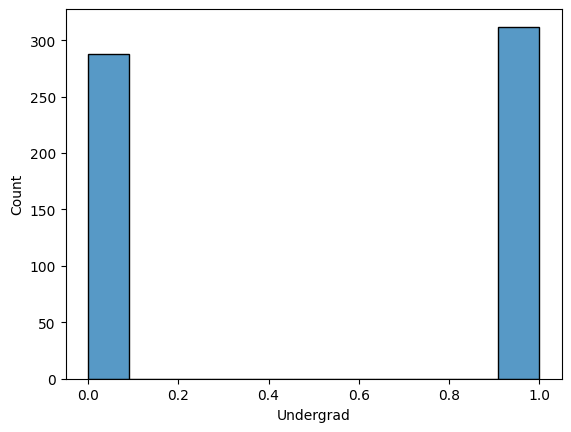

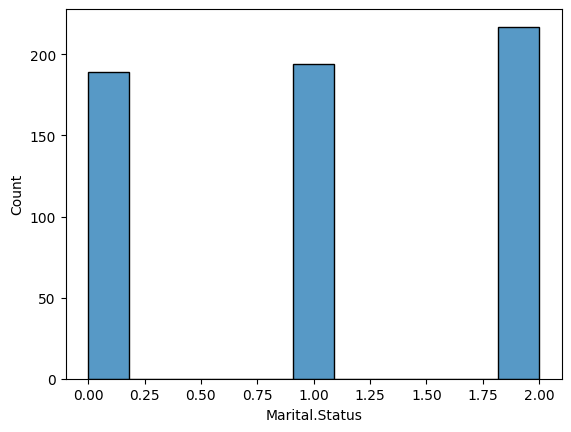

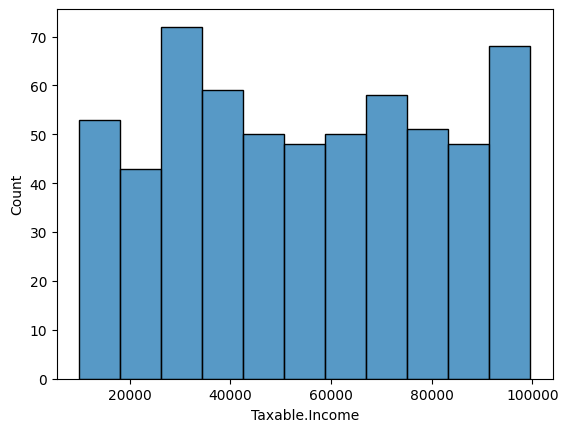

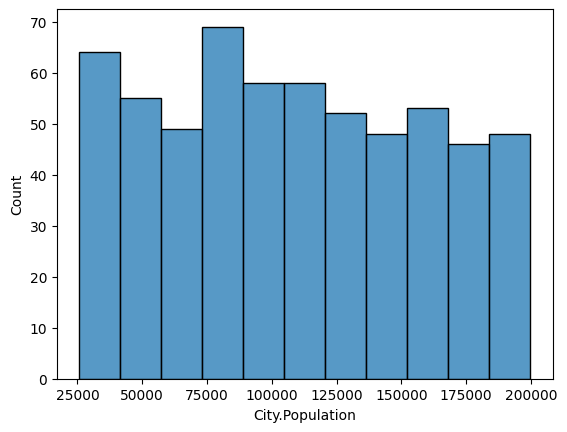

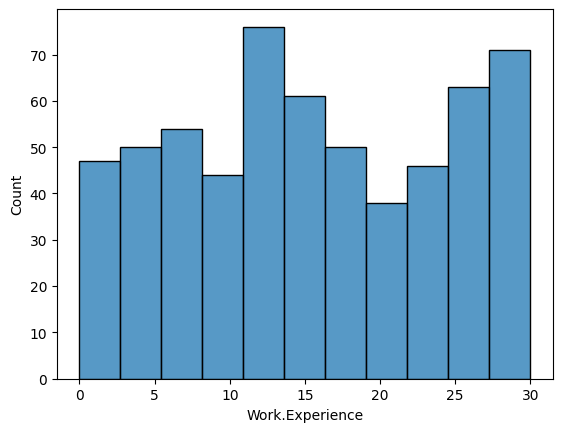

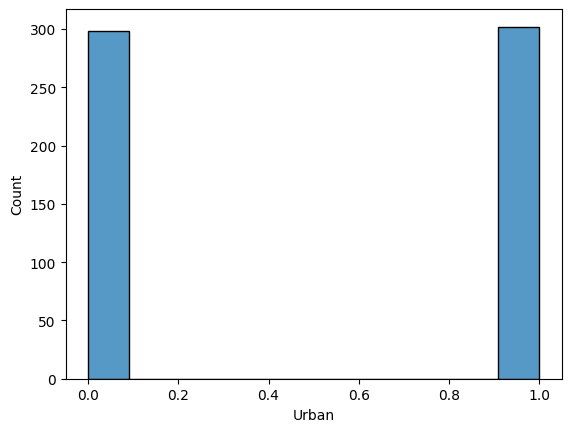

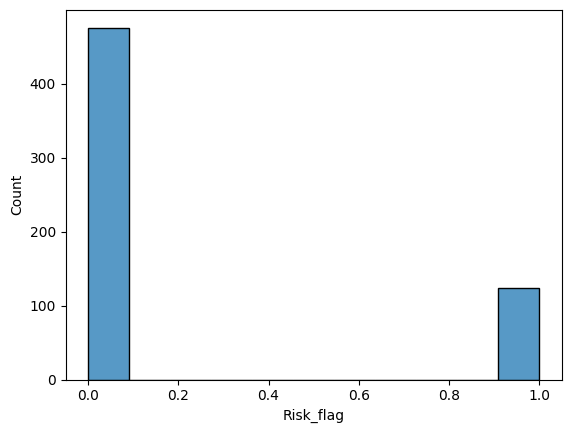

In [28]:
#---------------Bivariate analysis-----------------------------------------------------
#constructiing the histogram plot for all X variables
import seaborn as sns
#Histogram for each feature with type
for column in df.select_dtypes(include=["int64"]):
    sns.histplot(x=df[column])#, hue=df['Urban'])
    plt.show()

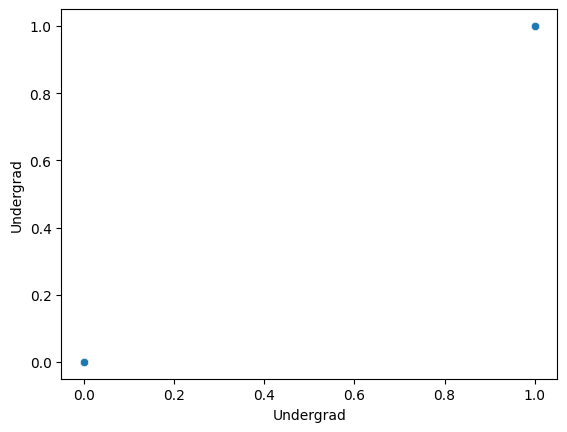

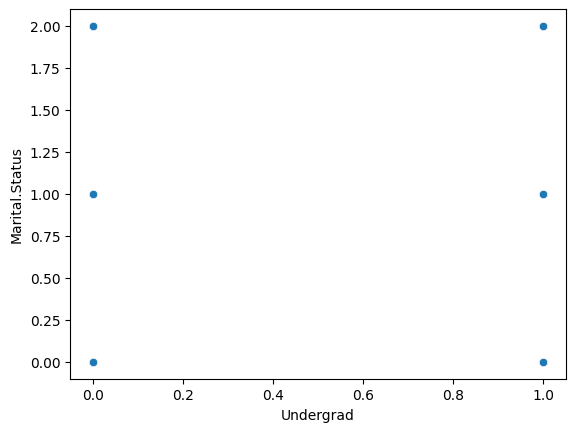

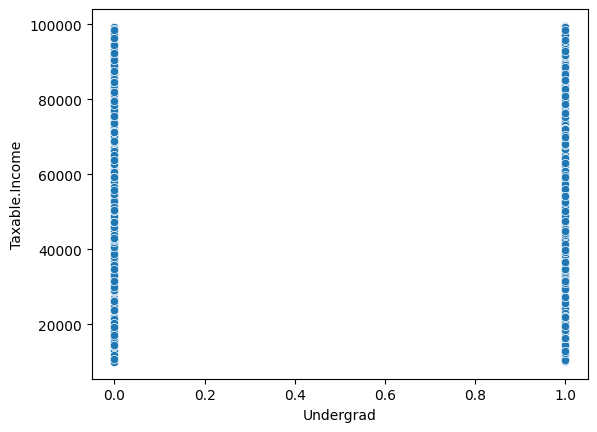

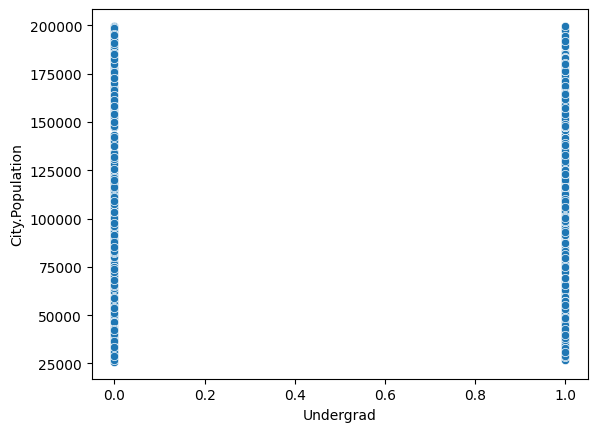

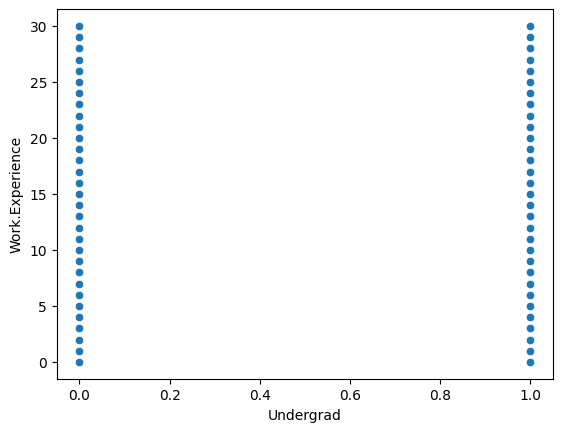

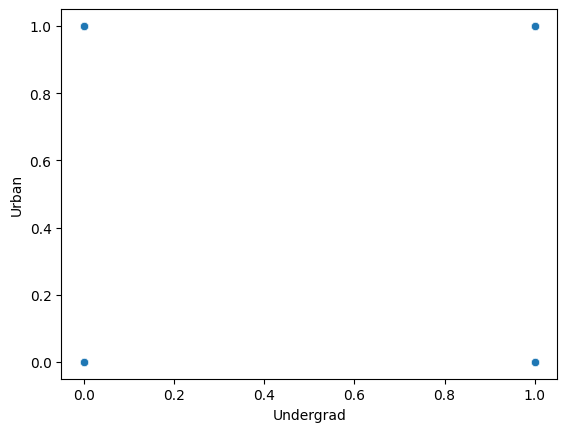

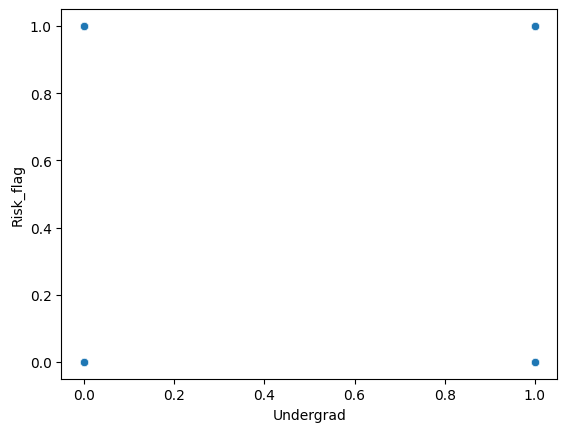

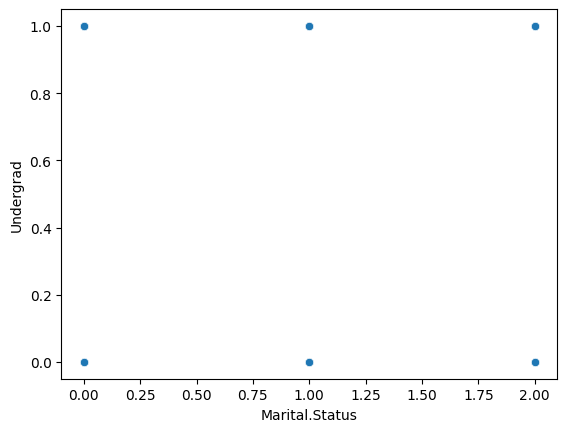

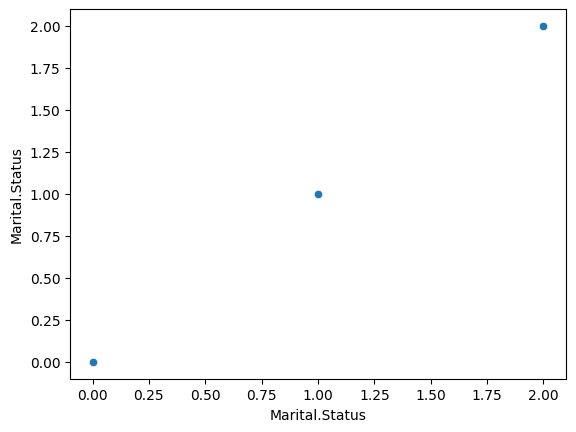

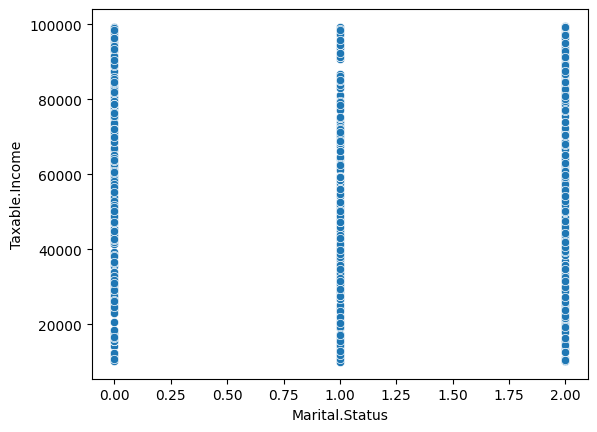

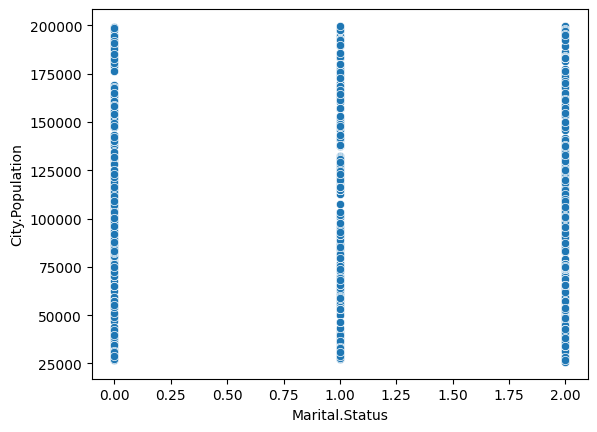

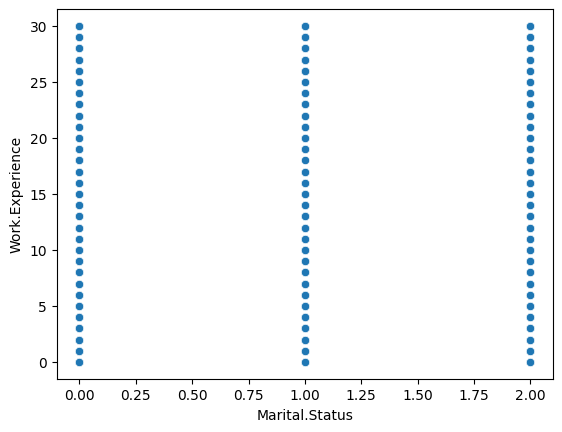

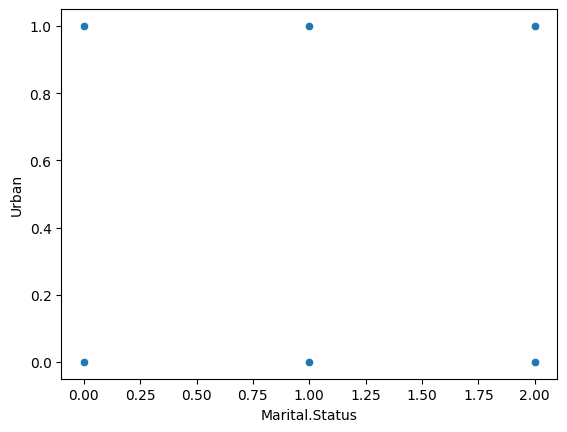

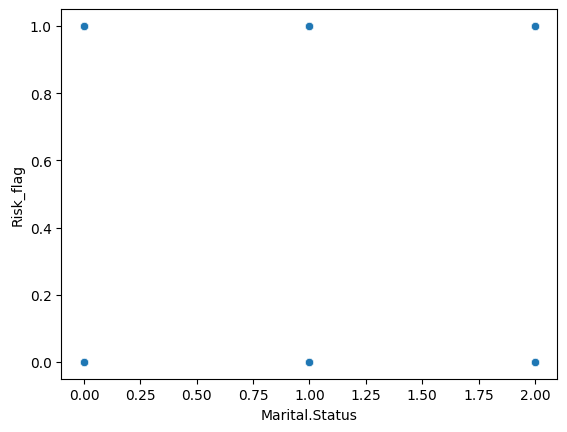

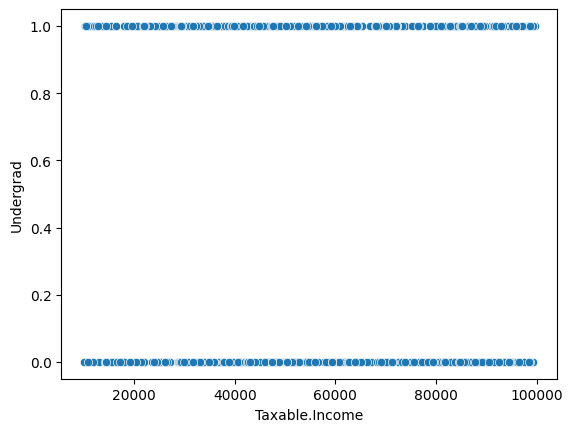

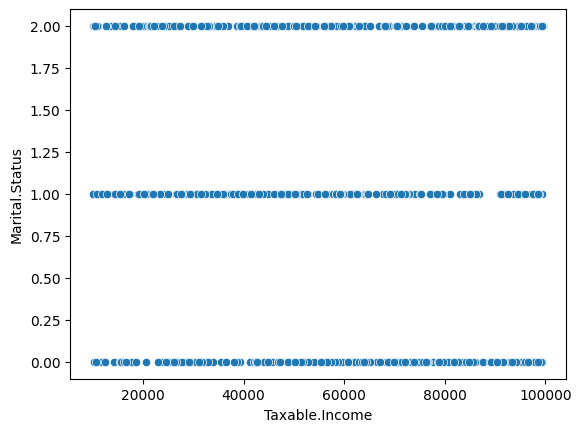

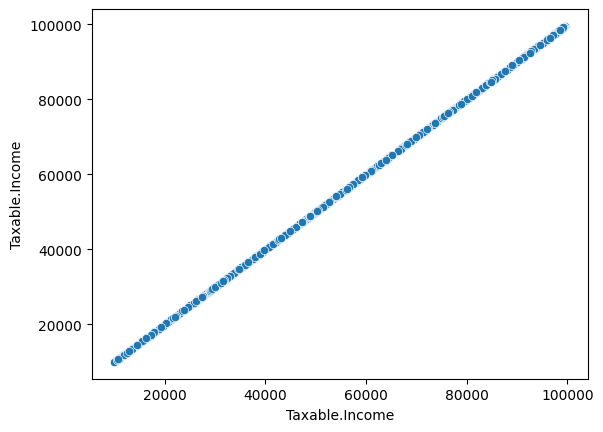

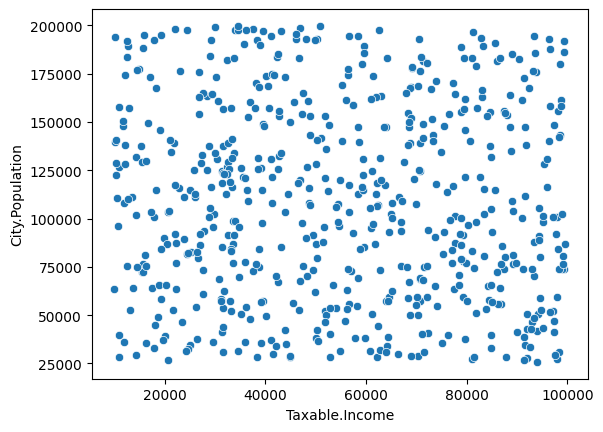

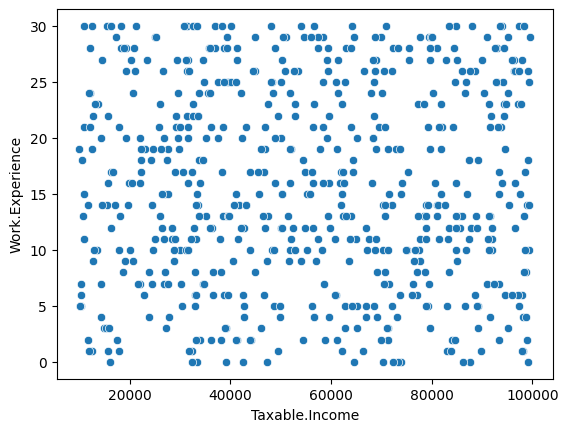

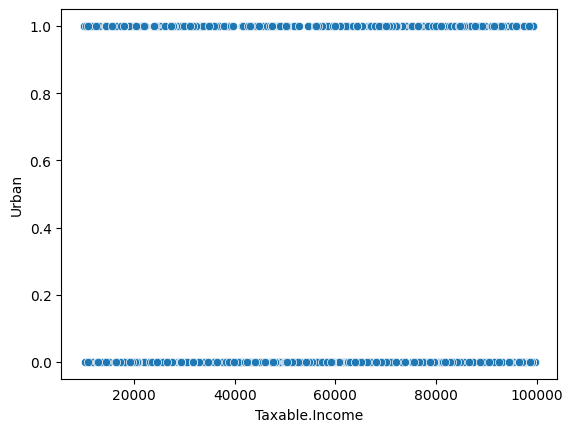

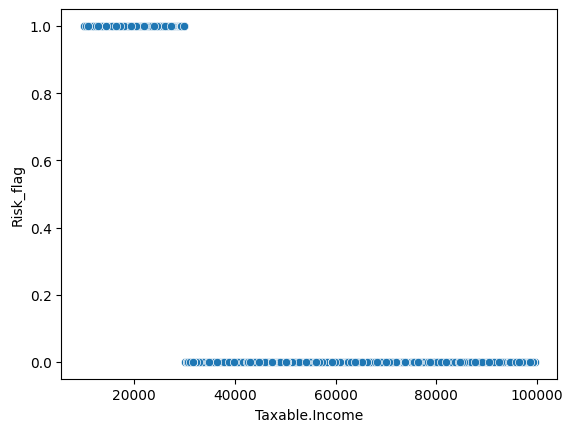

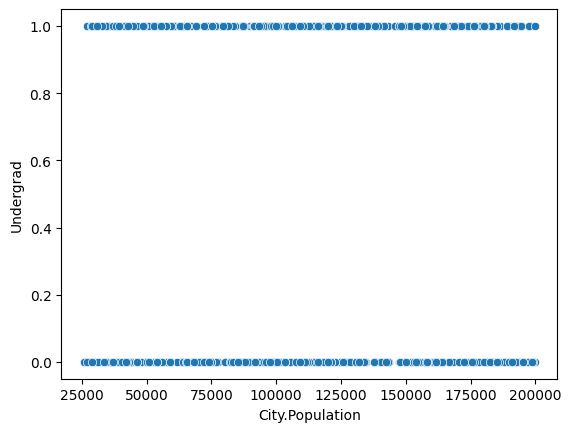

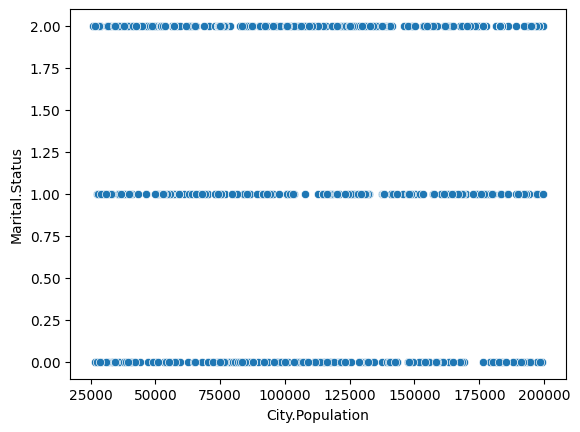

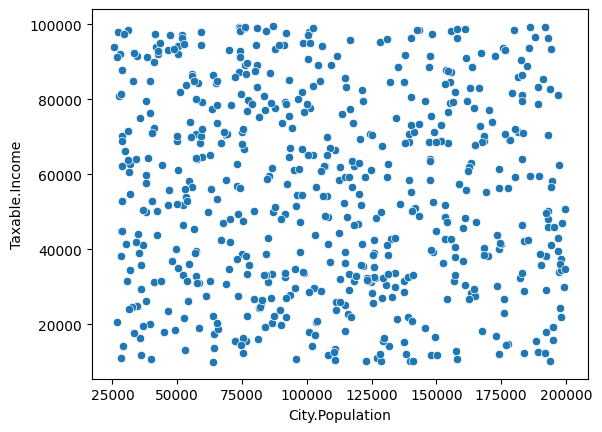

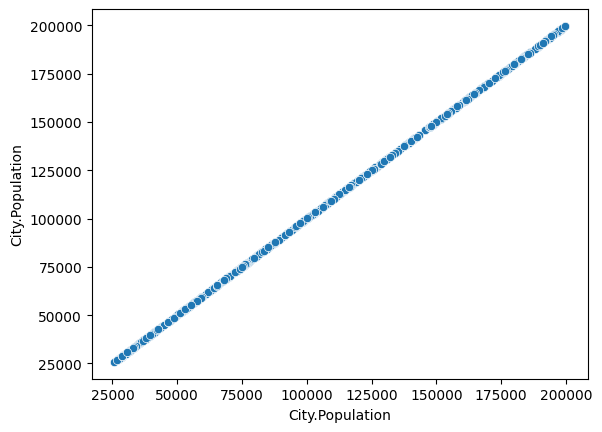

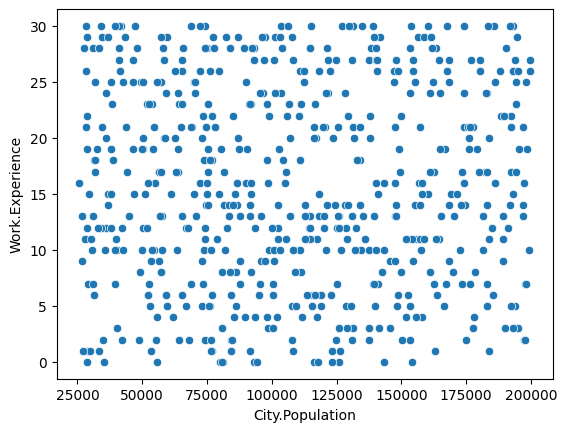

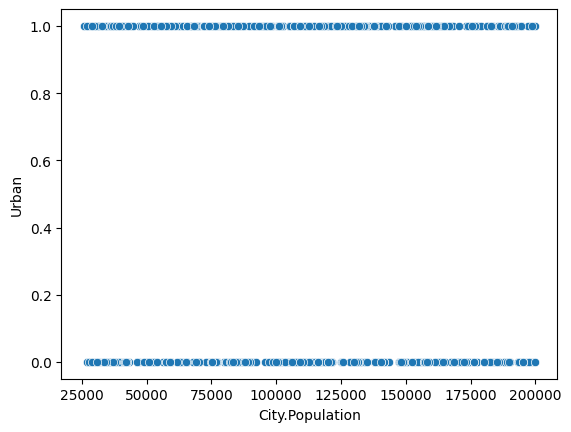

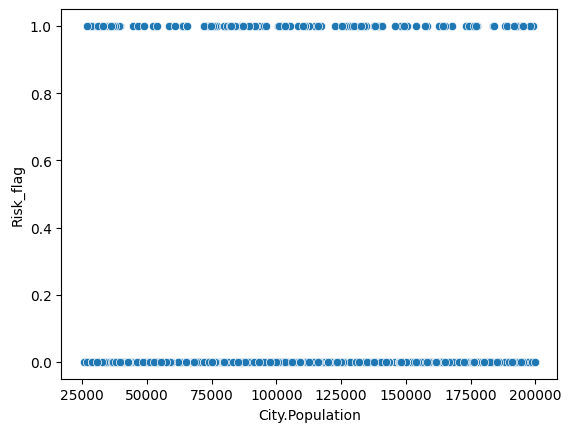

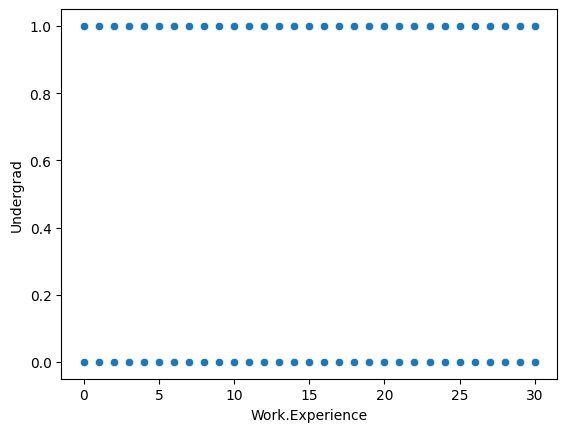

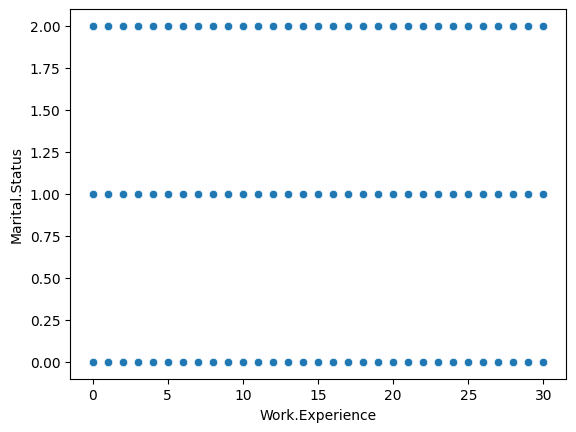

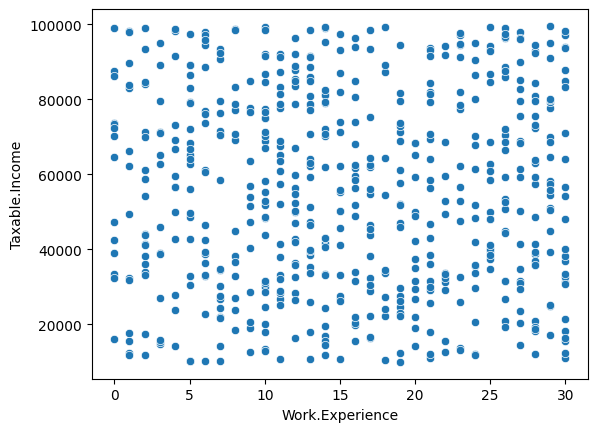

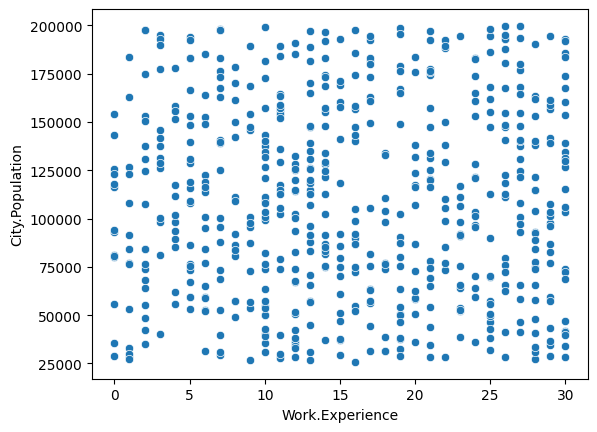

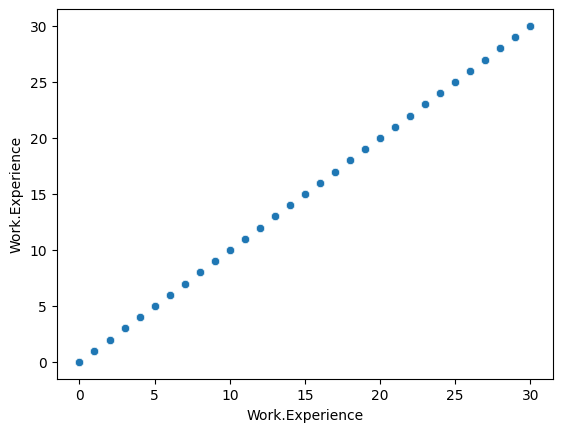

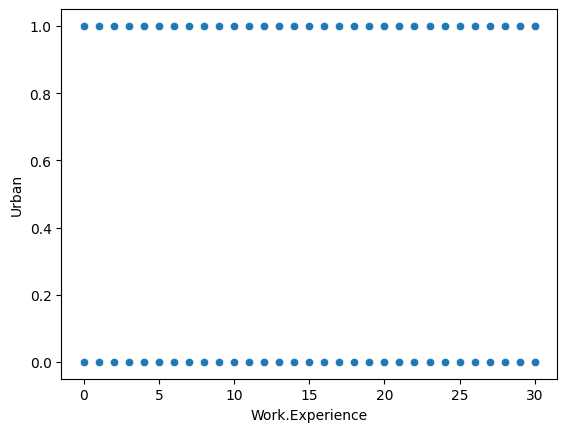

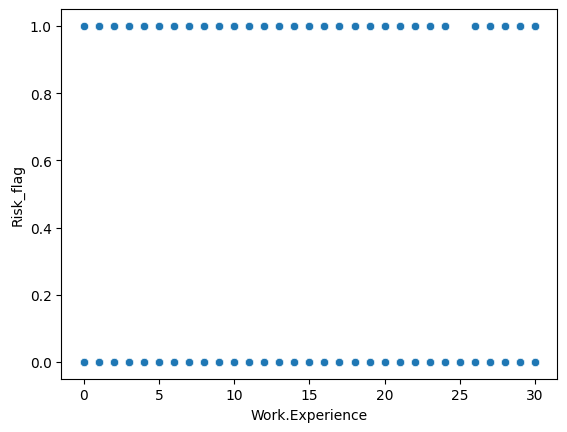

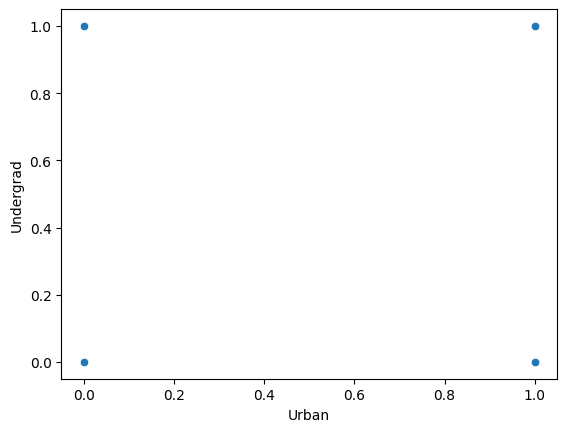

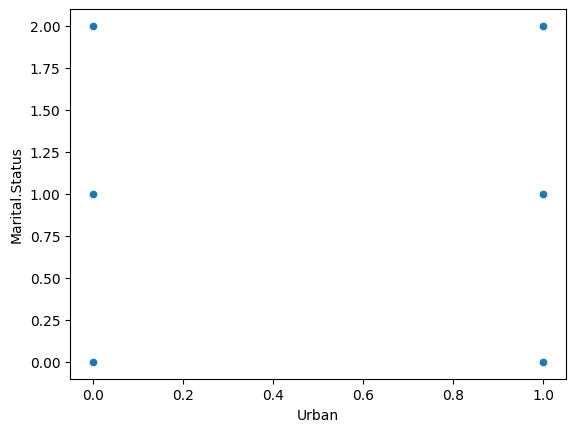

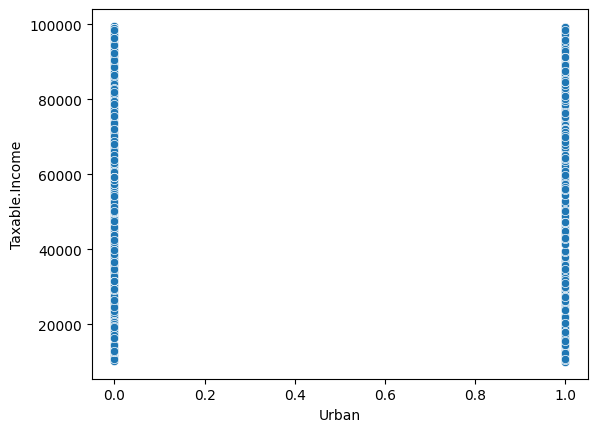

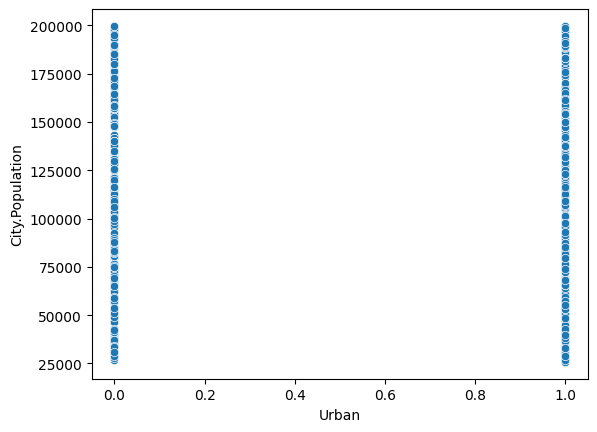

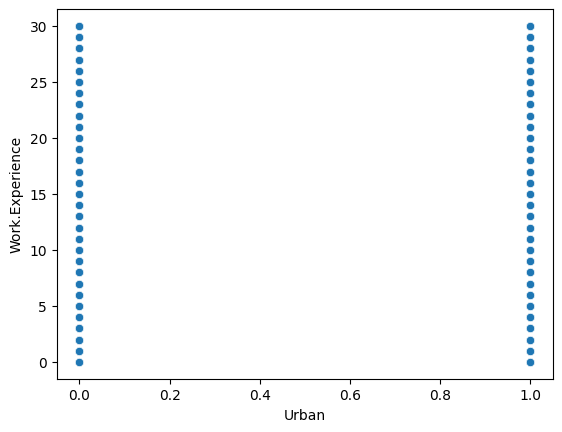

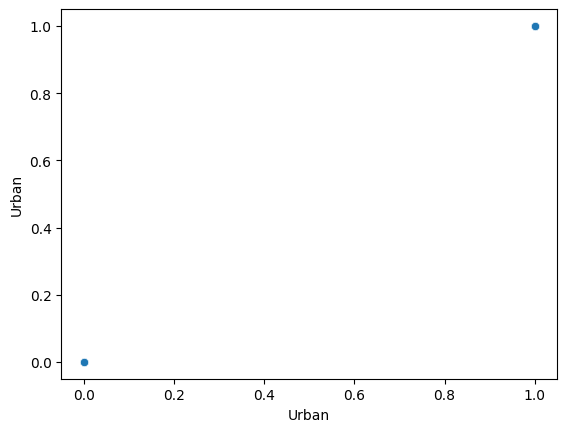

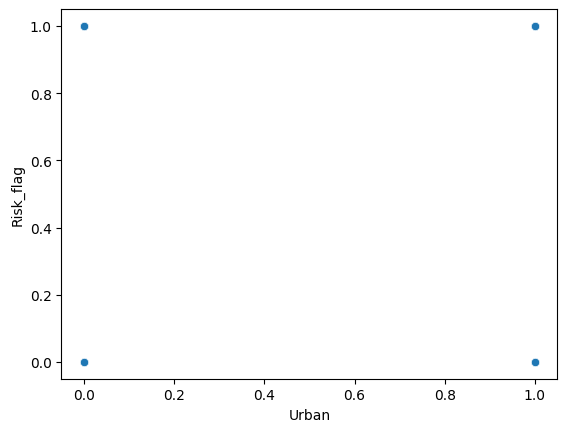

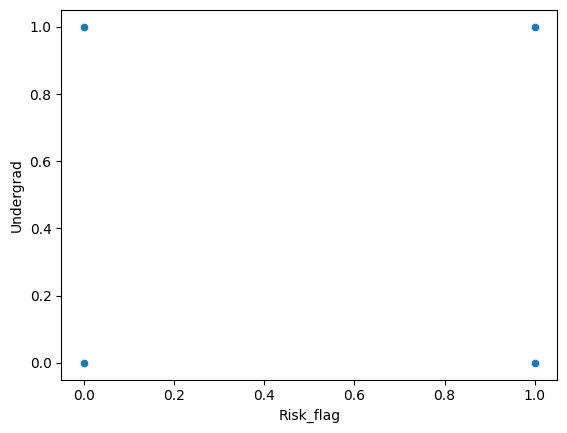

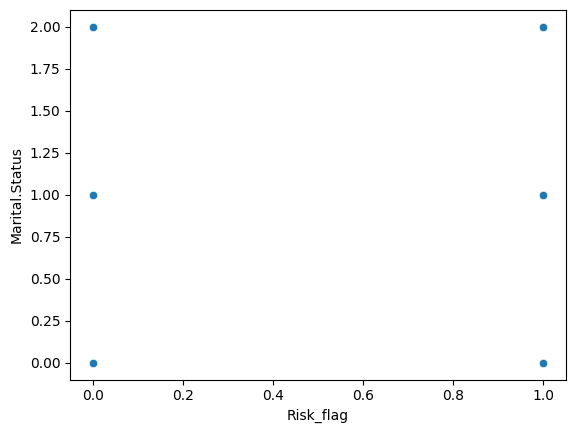

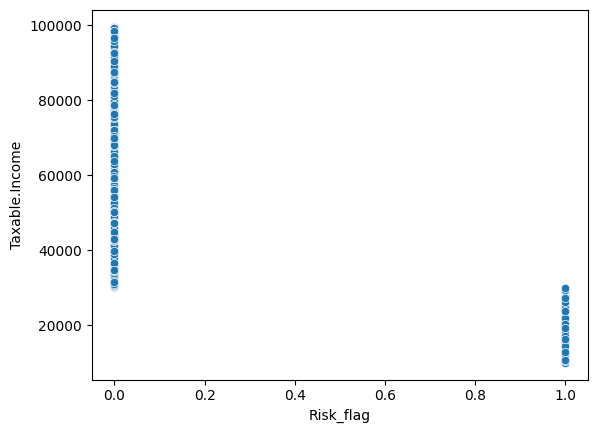

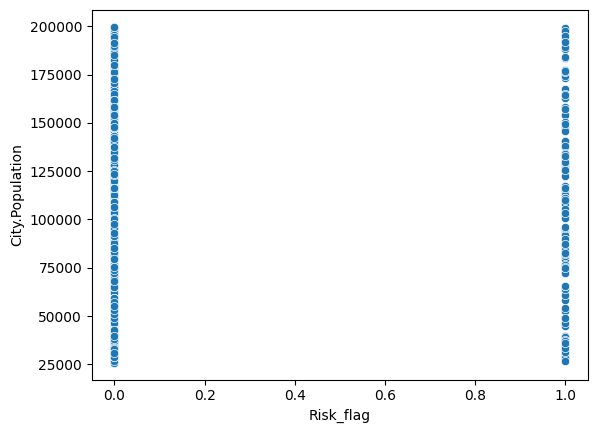

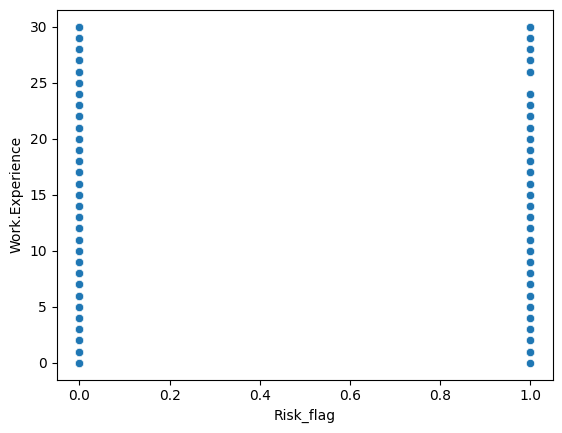

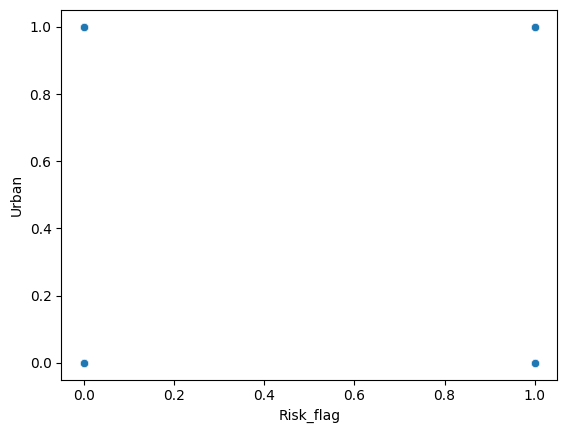

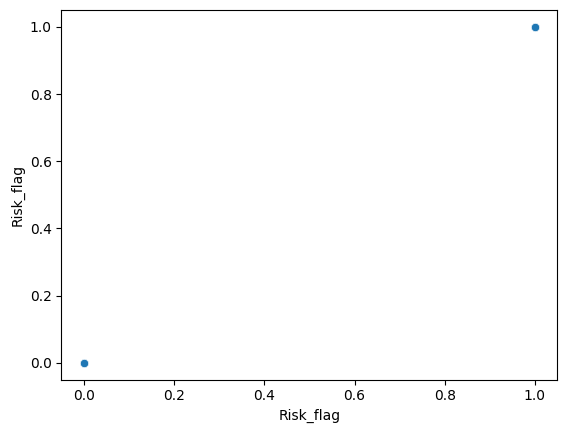

In [29]:
#Scatter plot for each pair of features
for i, column1 in enumerate(df.select_dtypes(include=["int64"])):
    for column2 in df.select_dtypes(include=["int64"])[i+1:]:
        sns.scatterplot(x=df[column1], y=df[column2])#, hue=df['Urban'])
        plt.show()
